In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import regex as re
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import simplejson as json

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [ ]:
import pandas as pd

df = pd.read_csv(r'c:\Users\Philip Nancollas\IdeaProjects\Python\4Geeks Final Project\finaldataset.csv')

C:\Users\Philip Nancollas\AppData\Local\Temp\ipykernel_584\2084980904.py:3: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kickstarter_data_2024.csv')


In [284]:
new_df = df[['blurb', 'category', 'state']]

In [285]:
def unpack_category(son):
    thingy = json.loads(son)
    real_category = ""
    if "parent_name" in thingy.keys():
        real_category = thingy['parent_name'] 
    return real_category

In [286]:
def unpack_subcat(son):
    thingy = json.loads(son)
    real_category = ""
    if "name" in thingy.keys():
        real_subcat = thingy['name'] 
    return real_subcat

In [281]:
category = df['category'][100000]
thingy = json.loads(category)
real_category = thingy['parent_name']
real_category

'Design'

In [287]:
new_df = df[['blurb', 'category', 'state']]

In [288]:
new_df.dropna()

,blurb,category,state
0,Astrological Connections and Personal Wisdom,"{""id"":260,""name"":""Interactive Design"",""analyti...",live
1,Cozy Kornerz is a fun new redecorating tool th...,"{""id"":260,""name"":""Interactive Design"",""analyti...",live
2,I want to design an exercise Matt with practic...,"{""id"":260,""name"":""Interactive Design"",""analyti...",live
3,A space engineered to promote informed consume...,"{""id"":260,""name"":""Interactive Design"",""analyti...",submitted
4,YourMD Online Connect: Redefining Telehealth f...,"{""id"":260,""name"":""Interactive Design"",""analyti...",submitted
...,...,...,...
2207599,Blackbird will be an incubator for up-and-comi...,"{""id"":24,""name"":""Performance Art"",""analytics_n...",successful
2207600,Nurture hundreds of plants at home and enjoy t...,"{""id"":52,""name"":""Hardware"",""analytics_name"":""H...",started
2207601,Send the Devil and his Minions back Whence The...,"{""id"":34,""name"":""Tabletop Games"",""analytics_na...",submitted
2207602,"Upgrade your game night with these beautiful, ...","{""id"":34,""name"":""Tabletop Games"",""analytics_na...",submitted


In [283]:
new_df['category'][0]

'{"id":260,"name":"Interactive Design","analytics_name":"Interactive Design","slug":"design/interactive design","position":4,"parent_id":7,"parent_name":"Design","color":2577151,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/design/interactive%20design"}}}'

In [289]:
new_df['category_name'] = new_df['category'].apply(unpack_category)
new_df['category_name']

C:\Users\Philip Nancollas\AppData\Local\Temp\ipykernel_584\1344081303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['category_name'] = new_df['category'].apply(unpack_category)


0              Design
1              Design
2              Design
3              Design
4              Design
              ...    
2207599           Art
2207600    Technology
2207601         Games
2207602         Games
2207603         Games
Name: category_name, Length: 2207604, dtype: object

In [290]:
new_df['subcategory'] = new_df['category'].apply(unpack_subcat)

C:\Users\Philip Nancollas\AppData\Local\Temp\ipykernel_584\3643047901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['subcategory'] = new_df['category'].apply(unpack_subcat)


In [291]:
new_df['subcategory'].value_counts()

subcategory
Web               45179
Product Design    42769
Fiction           38580
Comedy            36858
Tabletop Games    34844
                  ...  
Fashion             478
Comics              267
Film & Video        186
Taxidermy           161
Games               143
Name: count, Length: 161, dtype: int64

In [ ]:
# 'Games', 'Comics', 'Music', 'Design', 'Art', 'Publishing', 'Food',
#        'Fashion', 'Technology', 'Film & Video', nan, 'Dance',
#        'Photography', 'Theater', 'Journalism', 'Crafts'

In [1]:
#Reset from subcategory filter here
tech_df = new_df[new_df['category_name'] == 'Games']
tech_df.shape

NameError: name 'new_df' is not defined

In [293]:
tech_df = tech_df.drop_duplicates()
tech_df = tech_df.reset_index(inplace = False, drop = True)
tech_df.shape

(25641, 5)

In [258]:
tech_df['state'].value_counts()

state
successful    10815
failed        10368
live           2050
canceled       1298
submitted      1053
started          56
suspended         1
Name: count, dtype: int64

In [259]:
tech_df['subcategory'].value_counts()

subcategory
Apps                 3278
Gadgets              3149
Hardware             3028
Software             2817
Web                  2689
Wearables            2304
DIY Electronics      1756
3D Printing          1465
Sound                1391
Robots               1029
Camera Equipment      861
Flight                525
Space Exploration     486
Fabrication Tools     459
Makerspaces           404
Name: count, dtype: int64

In [294]:
tech_df = tech_df[tech_df['state'] != "live"]
tech_df = tech_df[tech_df['state'] != "submitted"]
tech_df = tech_df[tech_df['state'] != "canceled"]
tech_df = tech_df[tech_df['state'] != "started"]
tech_df = tech_df[tech_df['state'] != "suspended"]

In [295]:
tech_df["state"] = tech_df["state"].apply(lambda x: 1 if x == "successful" else 0).astype(int)
tech_df['state'].value_counts()

state
1    10815
0    10368
Name: count, dtype: int64

In [296]:
tech_df_success = tech_df[tech_df['state'] == 1]
tech_df_success

,blurb,category,state,category_name,subcategory
0,"Ignition is a Social Retro Gaming ""OS"" for the...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
1,Raising money is easy -- managing your project...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
2,Awesome Web APIs with Django REST framework 3.,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
3,Does your insurance company advertise on TV? I...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
4,A cross-platform multi-service gaming AIR nati...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
...,...,...,...,...,...
24343,Magnetic Design | Pocket Size | 360° Heating |...,"{""id"":337,""name"":""Gadgets"",""analytics_name"":""G...",1,Technology,Gadgets
24344,Stylish open-back audiophile headphones made i...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",1,Technology,Sound
24345,It’s time to Embark on a Quest for Wellness: Y...,"{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
24368,"160,000RPM丨 2-in-1 Duster & Vacuum丨Real-time R...","{""id"":337,""name"":""Gadgets"",""analytics_name"":""G...",1,Technology,Gadgets


In [297]:
tech_df_fail = tech_df[tech_df['state'] == 0]

In [298]:
success_counts = tech_df_success['subcategory'].value_counts()
success_counts = success_counts.to_dict()
success_counts

{'Gadgets': 2496,
 'Hardware': 2378,
 'DIY Electronics': 829,
 'Wearables': 778,
 'Apps': 756,
 '3D Printing': 618,
 'Sound': 611,
 'Software': 574,
 'Camera Equipment': 452,
 'Robots': 410,
 'Web': 405,
 'Space Exploration': 181,
 'Fabrication Tools': 132,
 'Makerspaces': 99,
 'Flight': 96}

In [299]:
fail_counts = tech_df_fail['subcategory'].value_counts()
fail_counts = fail_counts.to_dict()
fail_counts

{'Web': 2038,
 'Software': 1878,
 'Apps': 1812,
 'Wearables': 1019,
 'DIY Electronics': 680,
 '3D Printing': 534,
 'Sound': 493,
 'Robots': 427,
 'Flight': 351,
 'Camera Equipment': 259,
 'Fabrication Tools': 253,
 'Space Exploration': 247,
 'Makerspaces': 238,
 'Hardware': 139}

In [300]:
category_ratio = fail_counts
for key in fail_counts.keys():
    category_ratio[key] = success_counts[key]/fail_counts[key]

category_ratio

{'Web': 0.1987242394504416,
 'Software': 0.30564430244941426,
 'Apps': 0.41721854304635764,
 'Wearables': 0.7634936211972522,
 'DIY Electronics': 1.2191176470588236,
 '3D Printing': 1.1573033707865168,
 'Sound': 1.2393509127789046,
 'Robots': 0.9601873536299765,
 'Flight': 0.27350427350427353,
 'Camera Equipment': 1.7451737451737452,
 'Fabrication Tools': 0.5217391304347826,
 'Space Exploration': 0.7327935222672065,
 'Makerspaces': 0.41596638655462187,
 'Hardware': 17.107913669064747}

In [ ]:
# tech_df = tech_df[tech_df['subcategory'] == 'Apps'] #Edit or remove this line to filter by subcategory

In [301]:
tech_df[tech_df.select_dtypes(['object']).columns] = tech_df.select_dtypes(['object']).astype(str)

tech_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21183 entries, 0 to 25215
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   blurb          21183 non-null  object
 1   category       21183 non-null  object
 2   state          21183 non-null  int64 
 3   category_name  21183 non-null  object
 4   subcategory    21183 non-null  object
dtypes: int64(1), object(4)
memory usage: 993.0+ KB


In [269]:
tech_df

,blurb,category,state,category_name,subcategory
3733,The InCanterbury App is a platform to connect ...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
3734,Long-term rent of budget rooms app without rea...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
3735,An App/ Platform created for Women to feel saf...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
3736,The game changer the service industry didn't k...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
3737,eco.tour will help you travel the world withou...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
...,...,...,...,...,...
24352,This product will revolutionize how people acc...,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
24383,"One stop to buy Service, Products, Food, Cloth...","{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
24384,"Fuel delivery, jumpstarts, lockouts, and towin...","{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps
24385,Crowd chatting for festival and con goers,"{""id"":332,""name"":""Apps"",""analytics_name"":""Apps...",0,Technology,Apps


In [302]:
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-zA-Z]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

tech_df["blurb"] = tech_df["blurb"].apply(preprocess_text)
tech_df.head()

,blurb,category,state,category_name,subcategory
0,"[ignition, is, social, retro, gaming, os, for,...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
1,"[raising, money, is, easy, managing, your, pro...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
2,"[awesome, web, apis, with, django, rest, frame...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
3,"[does, your, insurance, company, advertise, on...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
4,"[a, cross, platform, multi, service, gaming, a...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software


In [303]:
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")
stop_words.append('designed')
stop_words.append('kickstarter')
stop_words.append('name')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

tech_df["blurb"] = tech_df["blurb"].apply(lemmatize_text)
tech_df.head()

[nltk_data] Downloading package wordnet to C:\Users\Philip
[nltk_data]     Nancollas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Philip
[nltk_data]     Nancollas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,blurb,category,state,category_name,subcategory
0,"[ignition, social, retro, gaming, feature, gam...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
1,"[raising, money, easy, managing, project, hard...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
2,"[awesome, apis, django, rest, framework]","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
3,"[insurance, company, advertise, spending, mone...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
4,"[cross, platform, multi, service, gaming, nati...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software


In [304]:
success_tech_df = tech_df[tech_df['state'] == 1]
success_tech_df

,blurb,category,state,category_name,subcategory
0,"[ignition, social, retro, gaming, feature, gam...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
1,"[raising, money, easy, managing, project, hard...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
2,"[awesome, apis, django, rest, framework]","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
3,"[insurance, company, advertise, spending, mone...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
4,"[cross, platform, multi, service, gaming, nati...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
...,...,...,...,...,...
24343,"[magnetic, design, pocket, size, heating, fast...","{""id"":337,""name"":""Gadgets"",""analytics_name"":""G...",1,Technology,Gadgets
24344,"[stylish, open, back, audiophile, headphone, m...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",1,Technology,Sound
24345,"[time, embark, quest, wellness, health, journe...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",1,Technology,Software
24368,"[duster, vacuum, real, time, display, palm, si...","{""id"":337,""name"":""Gadgets"",""analytics_name"":""G...",1,Technology,Gadgets


In [305]:
failed_tech_df = tech_df[tech_df['state'] == 0]
failed_tech_df

,blurb,category,state,category_name,subcategory
180,"[dmini, display, mini, application, comfortabl...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",0,Technology,Software
181,"[connect, drag, racer, share, passion, latest,...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",0,Technology,Software
182,"[naturenet, explore, learn, connect, natural, ...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",0,Technology,Software
183,"[applift, take, care, entire, application, pro...","{""id"":51,""name"":""Software"",""analytics_name"":""S...",0,Technology,Software
184,"[breaking, cycle, poverty, educating, poor]","{""id"":51,""name"":""Software"",""analytics_name"":""S...",0,Technology,Software
...,...,...,...,...,...
25118,"[timing, chain, conversion, replace, timing, b...","{""id"":52,""name"":""Hardware"",""analytics_name"":""H...",0,Technology,Hardware
25141,"[innovative, universal, controller, whose, plu...","{""id"":52,""name"":""Hardware"",""analytics_name"":""H...",0,Technology,Hardware
25169,"[developing, reliable, highly, accurate, liqui...","{""id"":52,""name"":""Hardware"",""analytics_name"":""H...",0,Technology,Hardware
25170,"[elderly, physically, challenged, capable, peo...","{""id"":52,""name"":""Hardware"",""analytics_name"":""H...",0,Technology,Hardware


In [306]:
success_words = []
for words in success_tech_df['blurb']:
    for word in words:
        success_words.append(word)

len(success_words)
success_words

['ignition',
 'social',
 'retro',
 'gaming',
 'feature',
 'gaming',
 'achievement',
 'gamer',
 'profile',
 'online',
 'play',
 'raising',
 'money',
 'easy',
 'managing',
 'project',
 'hard',
 'wrote',
 'backersupport',
 'ease',
 'pain',
 'like',
 'everyone',
 'awesome',
 'apis',
 'django',
 'rest',
 'framework',
 'insurance',
 'company',
 'advertise',
 'spending',
 'money',
 'protecting',
 'need',
 'service',
 'cross',
 'platform',
 'multi',
 'service',
 'gaming',
 'native',
 'extension',
 'provide',
 'common',
 'google',
 'play',
 'service',
 'apple',
 'game',
 'center',
 'boldforce',
 'help',
 'high',
 'potential',
 'youth',
 'opportunity',
 'setting',
 'navigate',
 'stem',
 'career',
 'pathway',
 'yeswecodehack',
 'true',
 'next',
 'generation',
 'ability',
 'think',
 'learn',
 'adapt',
 'converse',
 'freely',
 'price',
 'coffee',
 'book',
 'website',
 'teach',
 'swift',
 'apple',
 'programming',
 'language',
 'power',
 'next',
 'generation',
 'apps',
 'learn',
 'python',
 'used',
 

In [307]:
fail_words = []
for words in failed_tech_df['blurb']:
    for word in words:
        fail_words.append(word)

fail_words

['dmini',
 'display',
 'mini',
 'application',
 'comfortable',
 'work',
 'window',
 'physical',
 'display',
 'connect',
 'drag',
 'racer',
 'share',
 'passion',
 'latest',
 'news',
 'update',
 'naturenet',
 'explore',
 'learn',
 'connect',
 'natural',
 'world',
 'pocket',
 'adventure',
 'awaits',
 'applift',
 'take',
 'care',
 'entire',
 'application',
 'process',
 'saving',
 'time',
 'energy',
 'often',
 'tedious',
 'exhausting',
 'task',
 'breaking',
 'cycle',
 'poverty',
 'educating',
 'poor',
 'private',
 'cloud',
 'peer',
 'peer',
 'social',
 'networking',
 'distributed',
 'decentralized',
 'privacy',
 'focused',
 'encrypted',
 'business',
 'appointment',
 'scheduler',
 'make',
 'scheduling',
 'time',
 'management',
 'much',
 'easier',
 'unique',
 'smart',
 'feature',
 'website',
 'builder',
 'future',
 'create',
 'digital',
 'presence',
 'together',
 'artificial',
 'intelligence',
 'evelyn',
 'element',
 'mapping',
 'beauty',
 'using',
 'crowdsourced',
 'insight',
 'guide',
 'urb

In [308]:
success_lim = len(success_words)
fail_lim = len(fail_words)
i = 0
j = 0

while i < success_lim:
    j = 0
    while j < fail_lim:
        if success_words[i] == fail_words[j]:
            del(success_words[i])
            success_lim = success_lim - 1
            del(fail_words[j])
            fail_lim = fail_lim - 1
        j = j + 1
    i = i + 1

KeyboardInterrupt: 

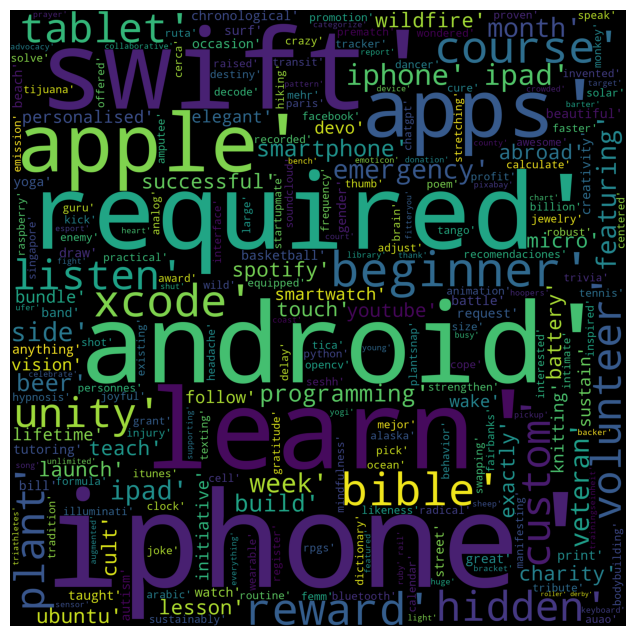

In [278]:
success_wordcloud = WordCloud(width = 2000, height = 2000, background_color = "black", max_words = 10000, min_font_size = 20, random_state = 42)\
    .generate(str(success_words))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(success_wordcloud)
plt.axis("off")
plt.show()

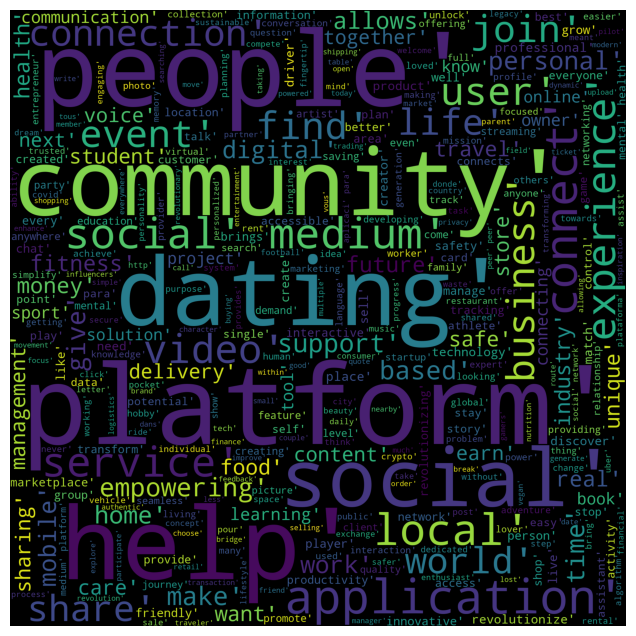

In [279]:
failed_wordcloud = WordCloud(width = 2000, height = 2000, background_color = "black", max_words = 10000, min_font_size = 20, random_state = 42)\
    .generate(str(fail_words))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(failed_wordcloud)
plt.axis("off")
plt.show()

In [309]:
tokens_list = tech_df["blurb"] #change if removing subset
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = tech_df["state"]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [311]:
rbf_model = SVC(kernel = "rbf", random_state = 42)
rbf_model.fit(X_train, y_train)

SVC(random_state=42)

In [312]:
y_pred = rbf_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Precision Score: " + str(precision_score(y_test, y_pred)))
print("Recall Score: " + str(recall_score(y_test, y_pred)))
print("F1 Score: " + str(f1_score(y_test, y_pred)))

Accuracy Score: 0.8323108384458078
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


c:\Users\Philip Nancollas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


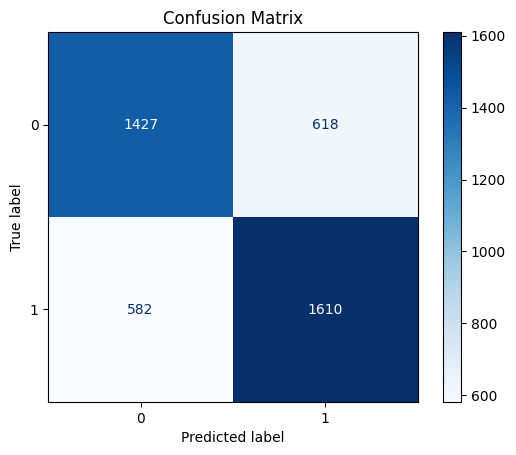

In [313]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [314]:
dump(rbf_model, open('tech_model.sav', 'wb'))

In [315]:
dump(vectorizer, open('tech_vectorizer.sav', 'wb'))